# Titanic 1: creating an intuition-based model

**Challenge overview:**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).


**Dataset variables:**

*   survival -->	Whether a passenger survived or not
*   pclass -->	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
*   sex -->	Sex
*   Age -->	Age in years
*   sibsp -->	# of siblings / spouses aboard the Titanic
*   parch -->	# of parents / children aboard the Titanic
*   ticket -->	Ticket number
*   fare -->	Passenger fare
*   cabin -->	Cabin number
*   embarked -->	Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## 1. Data reading & first glance

In [1]:
import pandas as pd

url = "https://drive.google.com/file/d/1g3uhw_y3tboRm2eYDPfUzXXsw8IOYDCy/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]


data = pd.read_csv(path)
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

The target column (what we want our model to predict) is usually denoted as `y` and we call it a `label`. We will "pop" it out from the rest of the data:

In [2]:
y = data.pop("Survived")
# y = data["Survived"].copy()

As you can see, the target is just a bunch of zeros and ones. 1 means the passenger survived and 0 means they did not survive:

In [3]:
print(y.tolist())

[0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

The "feature vector" (the columns used to predict the target) is denoted as `X`. 

Some of the columns in the original dataset are unique identifiers of each passenger. Unique identifiers are not useful when it comes to finding patterns in the data. So, the first step when building our `X`, the vector of predictor features, is to drop them:

In [4]:
X = data.drop(columns=["PassengerId", "Name", "Ticket"])
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


Even if the target (`y`) and the features (`X`) are in two different objects, there is still a very easy mapping between them: the first row in `X` and the first element in `y` both correspond to the first passenger, the second row in `X`and the second element in `y` correspond to the second passenger, and so on.

## 2. Basic Exploration

Just look briefly at the data types of your columns get get an idea of how they look like.

In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Cabin     204 non-null    object 
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 55.8+ KB


In [6]:
X.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

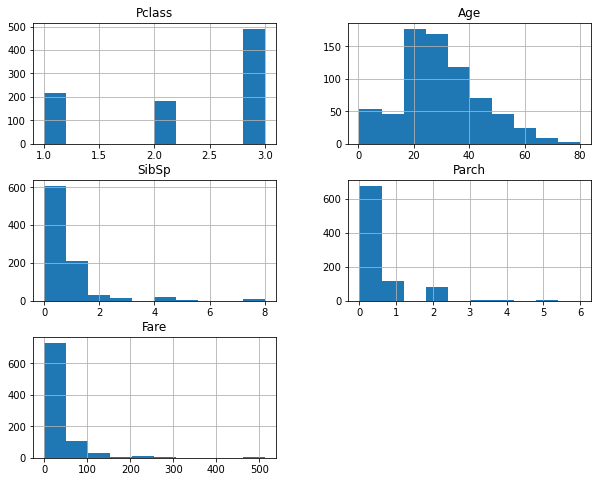

In [7]:
X.hist(figsize=(10, 8));

## 3. Train-test split

Before performing a deeper exploration, we will split the dataset into 2 chunks: train and test. We will use the train set to find patterns in the data and create a model. The test set will remain untouched, unseen, unexplored. It will be the "reality check" for our model, it will let us know whether our model is able to generalize. 

Here, we're using the function `train_test_split` to shuffle the observations randomly and create the train and test sets for both the `X` and the `y` objects at the same time, ensuring that they are shuffled the same way:

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31416)

In [9]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
477,3,male,29.0,1,0,7.0458,NaN,S
504,1,female,16.0,0,0,86.5000,B79,S
744,3,male,31.0,0,0,7.9250,NaN,S
473,2,female,23.0,0,0,13.7917,D,C
429,3,male,32.0,0,0,8.0500,E10,S


In [10]:
y_train.head()

477    0
504    1
744    1
473    1
429    1
Name: Survived, dtype: int64

As you can see from the indices, both the `X` and `y` train sets contain first the passenger in position `477`, then the one in position `504`, etc.

The same applies for the test set:

In [11]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
36,3,male,NaN,0,0,7.2292,NaN,C
716,1,female,38.0,0,0,227.5250,C45,C
131,3,male,20.0,0,0,7.0500,NaN,S
507,1,male,NaN,0,0,26.5500,NaN,S
13,3,male,39.0,1,5,31.2750,NaN,S


In [12]:
y_test

36     1
716    1
131    0
507    1
13     0
      ..
845    0
455    1
593    0
325    1
269    1
Name: Survived, Length: 179, dtype: int64

## 4. Iteration 0 - An intuition-based model

Machine Learning models should never be the first option to solve any problem. Machine Learning adds complexity to a business, and it should only be implemented if it represents a clear advantage compared to a simple working solution that the company has build following simple rules, common sense or gained expertise. 

Therefore, the first step when solving any problem should be to create a simple (even dumb) working solution and learn to evaluate it. In our example: how well can we predict survivalship with an extremely simple rule?

Let's start by suggesting that everyone died in the Titanic (I mean, the boat just sank in the middle of the ocean!). We will call this "model" the "pessimistic" one, and use it to make predictions for both the train and the test set:

In [13]:
y_train.value_counts()

0    438
1    274
Name: Survived, dtype: int64

In [14]:
len(y_train)

712

Our predictions for the train set will be just 712 zeros:

In [15]:
pred_pessimistic_train = pd.Series(0, index=range(712))

Now: how good are those predictions? We will compare them with the true values and find out the percentage of correctly predicted passengers. This metric is called **accuracy**:

In [16]:
from sklearn.metrics import accuracy_score

train_accuracy = accuracy_score(y_true = y_train,
                                 y_pred = pred_pessimistic_train
                                 )

round(train_accuracy, 2)

0.62

Okay, we have about a 62% accuracy in our train set. Let's find out how would have it done in our test set:

In [17]:
len(y_test)

179

In [18]:
pred_pessimistic_test = pd.Series(0, index=range(179))

In [19]:
test_accuracy = accuracy_score(y_true = y_test,
                               y_pred = pred_pessimistic_test
                               )

round(test_accuracy, 2)

0.62

The performance is pretty much the same. This is typical from simple models: they have a low performance, but the performance stays the same in the data where they were trained and in new data.

A model with a consistent performance between the training and testing set is said to have a **low variance**, which is good. However, a model with a low variance is said to have a **high bias**, which is not so good.

Our model, with high bias, is missing important connections between the features and the target. Another term to describe this is **underfitting**.


Ideally, we want a low variance and a low bias: a high accuracy consistent across the train and the test set.

https://www.bmc.com/blogs/bias-variance-machine-learning

## **Exercise 1**:

- Explore the train set and make another "intuition-based model" type of prediction. A possible guess, for example, would be that women survived and men died, since the policy of evacuation back then was gender-based.
- Check the accuracy of your new model both in the train set and in the test set. Have you improved the previous model? 
- Remember the accuracy you got. This is the baseline you are going to try to improve



> *Hint: creating this prediction is slightly more complex than predicting that everyone died. You can create the prediction as a new column of the dataframe using `.assign()`. You can fill it by zeros when creating it and then use `.loc` to fill it with ones on the rows that match a certain condition (e.g. that those rows correspond to women).*



In [21]:
def sex_model(Sex):
  if Sex == 'male':
    return 0
  else:
    return 1

In [22]:
y_pred_dump1 = X_train['Sex'].apply(sex_model)

In [23]:
y_pred_dump1

477    0
504    1
744    0
473    1
429    0
      ..
679    0
425    0
322    1
367    1
838    0
Name: Sex, Length: 712, dtype: int64

In [24]:
y_train

477    0
504    1
744    1
473    1
429    1
      ..
679    1
425    0
322    1
367    1
838    1
Name: Survived, Length: 712, dtype: int64

In [25]:
accuracy_score(y_train,y_pred_dump1)

0.7823033707865169